In [1]:
import pandas as pd 
import numpy as np

In [3]:
# Load datasets
trades = pd.read_csv("historical_data.csv")
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
# Load datasets
sentiment = pd.read_csv("fear_greed_index.csv")
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
# Convert dates
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True, errors='coerce')
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [6]:
# Extract only date (daily level)
trades['date'] = trades['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date

## Define columns and rows

In [8]:
print("Trades Shape:", trades.shape)
print("Sentiment Shape:", sentiment.shape)

Trades Shape: (211224, 17)
Sentiment Shape: (2644, 4)


## Define missing values and duplicate values

In [9]:
print(trades.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64


In [10]:
print(sentiment.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [12]:
duplicate = trades[trades.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Account, Coin, Execution Price, Size Tokens, Size USD, Side, Timestamp IST, Start Position, Direction, Closed PnL, Transaction Hash, Order ID, Crossed, Fee, Trade ID, Timestamp, date]
Index: []


In [13]:
trades.drop_duplicates()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25


In [14]:
duplicate = sentiment[sentiment.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [timestamp, value, classification, date]
Index: []


In [15]:
sentiment.drop_duplicates()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


## Daily pnl , win rate ,average trade,number of trades per day

In [21]:
daily_pnl = trades.groupby('date')['Closed PnL'].sum().reset_index()


In [22]:
trades['win'] = np.where(trades['Closed PnL'] > 0, 1, 0)

daily_win = trades.groupby('date')['win'].mean().reset_index()
daily_win.rename(columns={'win':'win_rate'}, inplace=True)


In [23]:
daily_trades = trades.groupby('date').size().reset_index(name='trade_count')


In [24]:
df = daily_pnl.merge(daily_win, on='date')
df = df.merge(daily_trades, on='date')
df = df.merge(sentiment, on='date')

df.head()


,date,Closed PnL,win_rate,trade_count,timestamp,value,classification
0,2023-05-01,0.000000,0.000000,3,1682919000,63,Greed
1,2023-12-05,0.000000,0.000000,9,1701754200,75,Extreme Greed
2,2023-12-14,-205.434737,0.363636,11,1702531800,72,Greed
3,2023-12-15,-24.632034,0.000000,2,1702618200,70,Greed
4,2023-12-16,0.000000,0.000000,3,1702704600,67,Greed


## Leverage columns is not given in this dataset

## Part-B. Analysis 

In [34]:
import matplotlib.pyplot as plt

In [39]:
performance_summary = df.groupby('classification')[['Closed PnL','win_rate']].mean()
performance_summary


,Closed PnL,win_rate
classification,,
Extreme Fear,52793.589178,0.327341
Extreme Greed,23817.292199,0.467424
Fear,36891.818040,0.329112
Greed,11140.566181,0.335986
Neutral,19297.323516,0.331886


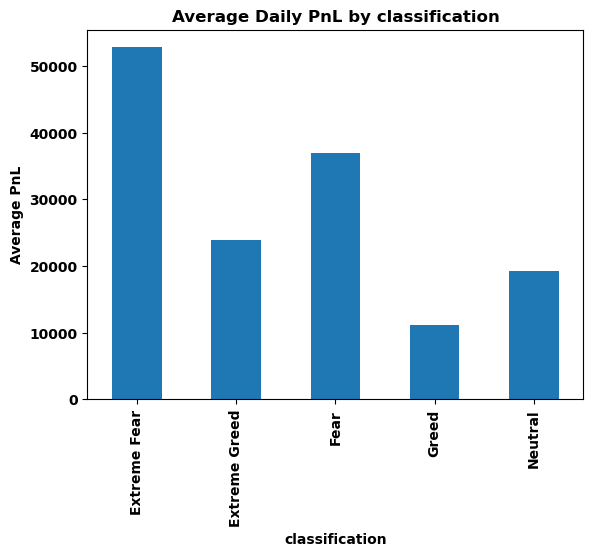

In [40]:
df.groupby('classification')['Closed PnL'].mean().plot(kind='bar')
plt.title("Average Daily PnL by classification")
plt.ylabel("Average PnL")
plt.show()


In [42]:
behavior_summary = df.groupby('classification')[['trade_count','value']].mean()
behavior_summary


,trade_count,value
classification,,
Extreme Fear,1528.571429,19.285714
Extreme Greed,350.807018,79.254386
Fear,679.527473,32.263736
Greed,260.637306,68.336788
Neutral,562.477612,49.791045


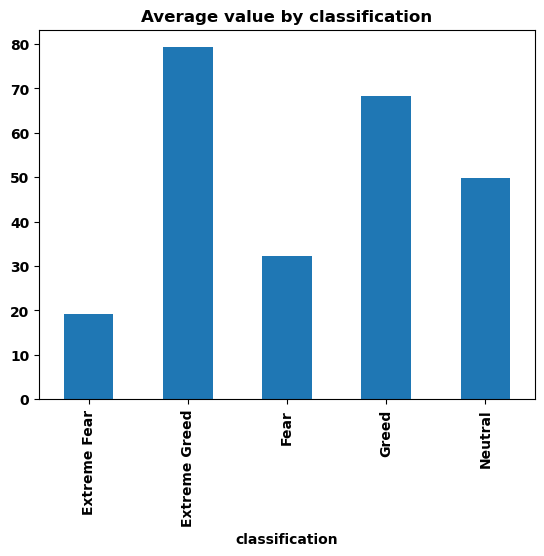

In [45]:
df.groupby('classification')['value'].mean().plot(kind='bar')
plt.title("Average value by classification")
plt.show()


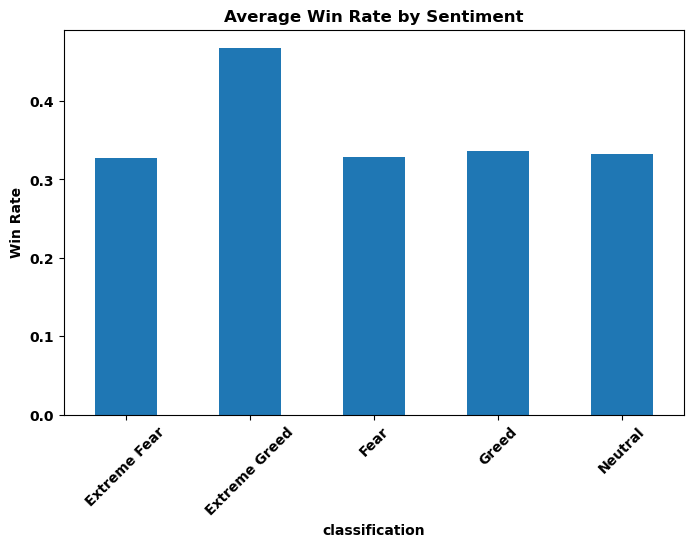

In [47]:
plt.figure(figsize=(8,5))
df.groupby('classification')['win_rate'].mean().plot(kind='bar')
plt.title("Average Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.xticks(rotation=45)
plt.show()


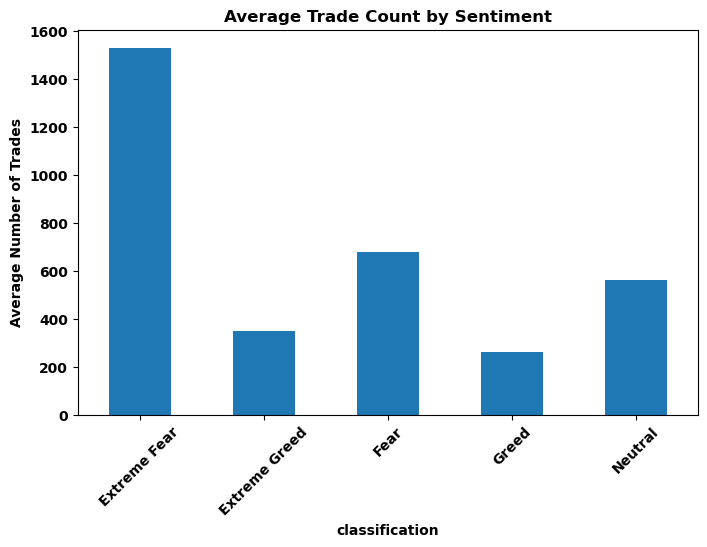

In [48]:
plt.figure(figsize=(8,5))
df.groupby('classification')['trade_count'].mean().plot(kind='bar')
plt.title("Average Trade Count by Sentiment")
plt.ylabel("Average Number of Trades")
plt.xticks(rotation=45)
plt.show()


<Figure size 800x500 with 0 Axes>

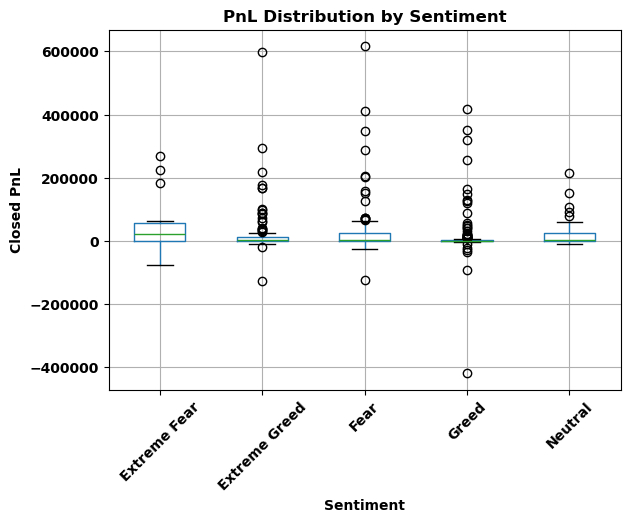

In [49]:
plt.figure(figsize=(8,5))
df.boxplot(column='Closed PnL', by='classification')
plt.title("PnL Distribution by Sentiment")
plt.suptitle('')
plt.xlabel("Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=45)
plt.show()


In [50]:
median_trades = df['trade_count'].median()

df['activity_segment'] = df['trade_count'].apply(
    lambda x: "High Activity" if x > median_trades else "Low Activity"
)

df.groupby('activity_segment')['Closed PnL'].mean()


activity_segment
High Activity    41510.953642
Low Activity      1389.037620
Name: Closed PnL, dtype: float64

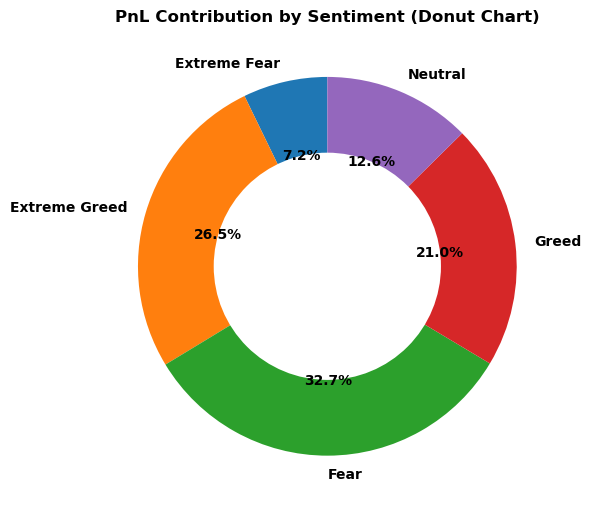

In [53]:
pnl_sum = df.groupby('classification')['Closed PnL'].sum()

plt.figure(figsize=(6,6))

wedges, texts, autotexts = plt.pie(
    pnl_sum,
    labels=pnl_sum.index,
    autopct='%1.1f%%',
    startangle=90
)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("PnL Contribution by Sentiment (Donut Chart)")
plt.tight_layout()
plt.show()


In [54]:
# Sort by date
df = df.sort_values('date')

# Create next day PnL
df['next_day_pnl'] = df['Closed PnL'].shift(-1)

# Create classification (1 = profit, 0 = loss)
df['target'] = df['next_day_pnl'].apply(lambda x: 1 if x > 0 else 0)

df = df.dropna()
df.head()


,date,Closed PnL,win_rate,trade_count,timestamp,value,classification,Sentiment,activity_segment,next_day_pnl,target
0,2023-05-01,0.000000,0.000000,3,1682919000,63,Greed,Greed,Low Activity,0.000000,0
1,2023-12-05,0.000000,0.000000,9,1701754200,75,Extreme Greed,Greed,Low Activity,-205.434737,0
2,2023-12-14,-205.434737,0.363636,11,1702531800,72,Greed,Greed,Low Activity,-24.632034,0
3,2023-12-15,-24.632034,0.000000,2,1702618200,70,Greed,Greed,Low Activity,0.000000,0
4,2023-12-16,0.000000,0.000000,3,1702704600,67,Greed,Greed,Low Activity,304.982785,1


In [55]:
X = df[['value', 'trade_count', 'win_rate']]
y = df['target']


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [64]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, classification_report

In [66]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8229166666666666
              precision    recall  f1-score   support

           0       0.67      0.11      0.19        18
           1       0.83      0.99      0.90        78

    accuracy                           0.82        96
   macro avg       0.75      0.55      0.55        96
weighted avg       0.80      0.82      0.77        96



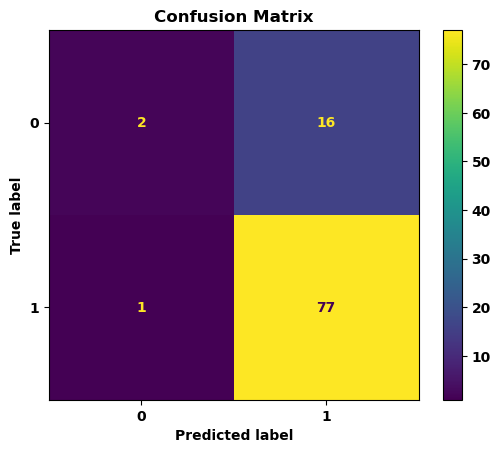

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['value', 'trade_count', 'win_rate']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

df.groupby('cluster')[['Closed PnL','trade_count','win_rate']].mean()


,Closed PnL,trade_count,win_rate
cluster,,,
0,-138.387000,85.537234,0.122181
1,62876.283299,1466.406250,0.456531
2,21597.132368,273.876289,0.555011


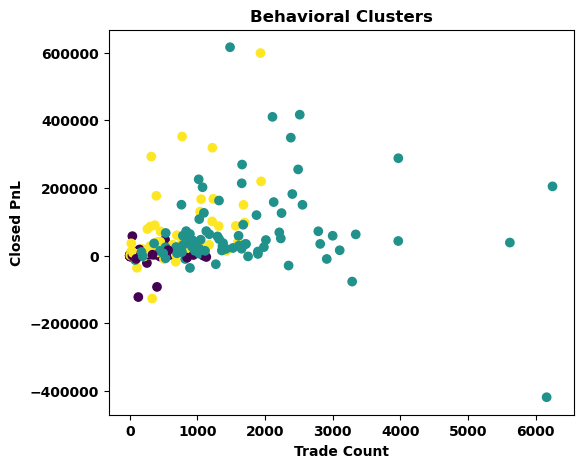

In [69]:
plt.figure(figsize=(6,5))
plt.scatter(df['trade_count'], df['Closed PnL'], c=df['cluster'])
plt.xlabel("Trade Count")
plt.ylabel("Closed PnL")
plt.title("Behavioral Clusters")
plt.show()
